### Business and Privacy Issues in Data Analysis - Data Anonymization & Differential Privacy
#### Data Anonymization - Exercise B


Data analytics has become an essential aspect of business operations in recent years. It enables companies to extract valuable insights and make data-driven decisions that can drive growth and profitability. However, data analytics also presents significant privacy and security challenges, especially when it involves the use of personal or sensitive data. To address these challenges, companies often rely on data anonymization techniques, which aim to remove personal identifiers from datasets or obscure them in a way that protects the privacy of individuals. One such technique is differential privacy, which adds random noise to data to prevent the identification of individuals in a dataset while still allowing for accurate analysis. This essay will explore the privacy and business issues associated with data analytics and the use of differential privacy as a data anonymization technique. In this notebook we are going to have a deeper look on such methodologies.

In this exercise, we will explore data anonymization and differential privacy techniques in data analytics. We will start by loading a dataset into a Python notebook, and displaying the first few rows to understand the data. Next, we will use the Amnesia anonymization tool to apply k-anonymity to the dataset and comment on the resulting dataset. We will then plot the distribution of numeric features in the dataset using histograms. After that, we will apply a random noise mechanism to some of the numeric columns using the Gaussian mechanism in a way that preserves differential privacy. We will calculate the differentially private averages for the individuals using the noisy data and plot the distribution of numeric features after the noise addition. Finally, we will try different values of the e parameter and comment on the effect of differential privacy on the results. For these steps, we will be using the differential privacy library and notebooks provided by IBM, which can be found at https://github.com/IBM/differential-privacy-library and https://github.com/IBM/differential-privacy-library/tree/main/notebooks, respectively.

#### Supervisor Professor: Mr. Manolis Terrovitis

Professor Mr. Manolis Terrovitis is the esteemed instructor of the lecture for which this assignment was given, and he also serves as the supervisor of this assignment. As a recognized expert in the field of data privacy and security, Professor Terrovitis has made significant contributions to the development and application of differential privacy techniques in data analytics. With his vast experience and expertise, he has provided valuable guidance and direction in shaping the content of this essay.

While the current analysis will be done on [Jupyter Notebook](http://jupyter.org/) and in [Python 3.10.0](https://www.python.org/downloads/release/python-3100/).

---

####  Team members:

---
> Dimitrios Matsanganis <br />
> Academic ID: f2822212 <br />
> MSc Business Analytics 2022-2023 FT <br />
> Athens University of Economics and Business <br />
> dmatsanganis@gmail.com, dim.matsanganis@aueb.gr

---

> Foteini Nefeli Nouskali <br />
> Academic ID: f2822213 <br />
> MSc Business Analytics 2022-2023 FT <br />
> Athens University of Economics and Business <br />
> fn.nouskali@gmail.com, fot.nouskali@aueb.gr

---

### Exercise B - Loading the necessary Python libraries
---
We are loading the necessary Python libraries that will be used for the implementation of differential privacy techniques and the conduct of histogram analysis. Firstly, we have imported the NumPy library, which is useful for handling and transforming data frames. Then, we have imported the Pandas library, which is another widely used library for data manipulation and analysis. Next, we have imported diffprivlib, a Python library that provides an implementation of several differential privacy algorithms. We have also imported the gaussian mechanism and tools from diffprivlib. Lastly, we have imported the matplotlib library, which is useful for graphical representations in the analysis. By importing these libraries, we are preparing the tools necessary for our data analysis and differential privacy implementation.

In [1]:
# Load the necessary Python libraries that will be used for the implementation of differential 
# privacy techniques and the conduct of histogram analysis.

# NumPy library for dataframe handling and transformations.
import numpy as np

# Pandas library for data manipulation and analysis.
import pandas as pd

# diffprivlib for differential privacy algorithm implementation.
from diffprivlib import tools as dp
from diffprivlib.mechanisms import gaussian
import diffprivlib

# Matplotlib for graphical representations in the analysis.
import matplotlib.pyplot as plt

---
### Data preprocessing steps
---
Data preprocessing is a critical step in any data analysis task, as it involves transforming raw data into a more manageable format for further analysis. In this exercise, we are tasked with applying differential privacy techniques to a given dataset while preserving the statistical properties of the original data. To achieve this goal, we will first load the dataset into a Python notebook and display the initial few rows to understand the data. We will then use the Amnesia anonymization tool to apply k-anonymity to the dataset and comment on the resulting dataset.

This code loads the original data from the csv file and the anonymized dataset from a .xls file into a Pandas DataFrame and removes the first and last columns, which are redundant. The resulting DataFrame is then displayed to give us a glimpse of the data we are working with.

In [2]:
# Load the dataset as a DataFrame and discard the redundant columns.
data = pd.read_csv('Datasets/pubs_df_titles.csv')

# Take a look at the dataset.
data.head(10)

,Record Type,Person Sequence Number,Substituted Person Flag,Person weight,Relationship,Relationship Allocation Flag,Own Child Indicator,Related Child Indicator,Sex,Sex Allocation Flag,...,Some other race recode,Race Short Recode,Race Detailed Recode,Race Checkbox Recode,Race Allocation Flag,Group Quarters Type,Group Quarters Allocation Flag,Padding,Housing/Group Quarters (GQ) Unit Serial Number,Age
0,P,1,0,10,17,0,0,0,1,0,...,0,1,1,1,0,2,0,,3,56
1,P,1,0,10,1,0,0,0,2,0,...,0,2,2,2,0,0,0,,4,56
2,P,2,0,10,3,0,0,0,2,0,...,0,2,2,2,0,0,0,,4,19
3,P,3,0,10,3,0,0,0,1,0,...,0,2,2,2,0,0,0,,4,18
4,P,4,0,10,3,0,1,1,2,0,...,0,2,2,2,0,0,0,,4,17
5,P,5,0,10,3,0,1,1,1,0,...,0,2,2,2,0,0,0,,4,14
6,P,1,0,10,1,0,0,0,1,0,...,0,1,1,1,0,0,0,,5,44
7,P,1,0,10,1,0,0,0,1,0,...,0,1,1,1,0,0,0,,6,88
8,P,1,0,10,1,0,0,0,1,0,...,0,1,1,1,0,0,0,,8,69
9,P,1,0,10,1,0,0,0,2,0,...,0,2,2,2,0,0,0,,9,24


To be more precise, the above code loads a CSV file named "pub_data.csv" into a pandas DataFrame called "data". It then drops the first and last columns of the DataFrame, which are assumed to be redundant. Finally, it displays the first 10 rows of the resulting DataFrame to allow the user to inspect the data.

In [3]:
# Load the anomymized by Amnesia dataset as a DataFrame and discard the redundant columns.
# The dataset is in .xls format, so we use pd.read_excel to load it.
anonymized_data = pd.read_excel('final_anonymized_dataset.xls')

# Take a look at the dataset.
anonymized_data.head(10)

,Housing.Group.Quarters..GQ..Unit.Serial.Number,Person.Sequence.Number,Substituted.Person.Flag,Relationship,Relationship.Allocation.Flag,Own.Child.Indicator,Related.Child.Indicator,Sex,Sex.Allocation.Flag,Same.Sex.Spouse.Flag,...,Asian.recode,Native.Hawaiian.recode,Other.Pacific.Islander.recode,Some.other.race.recode,Race.Short.Recode,Race.Detailed.Recode,Race.Checkbox.Recode,Race.Allocation.Flag,Group.Quarters.Type,Group.Quarters..Allocation.Flag
0,22000-23000,3-5,NotSubstituted,Family_Member,NotAllocated,No,No,Female,NotAllocated,NotChanged,...,No,No,No,No,White_alone,White_alone,White_alone,NotAllocated,Not_in_a_GQ,NotAllocated
1,12000-13000,3-5,NotSubstituted,Family_Member,NotAllocated,No,No,Female,NotAllocated,NotChanged,...,No,No,No,Yes,Two_or_more_major_race_groups,Two_or_more_major_races,Two_or_more_major_races,NotAllocated,Not_in_a_GQ,NotAllocated
2,42000-43000,0-3,NotSubstituted,Family_Member,NotAllocated,Yes,Yes,Female,NotAllocated,NotChanged,...,No,No,No,No,White_alone,White_alone,White_alone,NotAllocated,Not_in_a_GQ,NotAllocated
3,35000-36000,0-3,NotSubstituted,Family_Member,NotAllocated,No,No,Male,NotAllocated,NotChanged,...,No,No,No,No,White_alone,White_alone,White_alone,NotAllocated,Not_in_a_GQ,NotAllocated
4,12000-13000,0-3,NotSubstituted,Family_Member,NotAllocated,Yes,Yes,Male,NotAllocated,NotChanged,...,No,No,No,No,Black_or_African_American_alone,Black_or_African_American_alone,Black_or_African_American_alone,NotAllocated,Not_in_a_GQ,NotAllocated
5,7000-8000,3-5,NotSubstituted,Family_Member,NotAllocated,No,No,Male,NotAllocated,NotChanged,...,No,No,No,No,Black_or_African_American_alone,Black_or_African_American_alone,Black_or_African_American_alone,NotAllocated,Not_in_a_GQ,NotAllocated
6,11000-12000,3-5,NotSubstituted,Family_Member,NotAllocated,No,No,Male,NotAllocated,NotChanged,...,No,No,No,No,White_alone,White_alone,White_alone,NotAllocated,Not_in_a_GQ,NotAllocated
7,23000-24000,0-3,NotSubstituted,Family_Member,NotAllocated,No,No,Male,NotAllocated,NotChanged,...,No,No,No,No,White_alone,White_alone,White_alone,NotAllocated,Not_in_a_GQ,NotAllocated
8,22000-23000,5-8,NotSubstituted,Family_Member,NotAllocated,No,No,Male,NotAllocated,NotChanged,...,No,No,No,No,White_alone,White_alone,White_alone,NotAllocated,Not_in_a_GQ,NotAllocated
9,28000-29000,3-5,Substituted,Family_Member,Allocated,No,No,Male,Allocated,NotChanged,...,No,No,No,No,White_alone,White_alone,White_alone,Allocated,Not_in_a_GQ,NotAllocated


The following code retains only the numerical features of the dataset and stores them as separate vectors, as only numerical features will be used in the differential privacy analysis. The numerical features in the dataset are the person sequence number, the age, and the quarter of birth (although it is not a numerical feature exactly, we can consider it this way in order to incorporate it into the analysis).

We have stored the person sequence number, age, and the quarter of birth as separate vectors. Specifically, we have created a variable p_seq that represents the sequence number of each person, age represents the age of each person, and birth_q represents the numerical representation of the quarter of birth of each person. By creating separate vectors for these numerical features, we can easily apply differential privacy mechanisms to these vectors and analyze the impact of differential privacy on the distribution of these features.

In [4]:
# Retain only the numerical features of the dataset and store them as separate vectors,
# as only numerical features will be used in the differential privacy analysis.
# The numerical features in the dataset are the person sequence number, the age,
# and the quarter of birth (although it is not a numerical feature exactly, we can 
# consider it this way in order to incorporate it into the analysis).

# Person sequence number.
p_seq = data['Person Sequence Number']

# Person's age.
age = data['Age']

# Person's quarter of birth numerical representation.
birth_q = data['Quarter of Birth']

Now, we are converting the Pandas vectors to NumPy arrays in order to perform the NumPy histogram function. We also separate the bins for the categorization of numeric features' values. The three numeric features that we are interested in are person's sequence number, age, and quarter of birth, and we convert them to NumPy arrays.

In [5]:
# Transform Pandas vectors to NumPy arrays in order to perform the NumPy histogram function
# along with the bins separation for the categorization of numeric features' values.

# Persons' sequence number.
p_seq = p_seq.values

# Persons' age.
age = age.values

# Persons' quarter of birth.
birth_q = birth_q.values

#### Comment on the anonymized dataset (see documentation for more details)
---

The Amnesia anonymization tool was used to apply k-anonymity to a given dataset, resulting in a fully anonymized dataset with hierarchies that achieved a k-anonymity level of 3. The tool was able to achieve this level of anonymity while maintaining very small suppress rates even for 7 quasi-identifiers groups.

The resulting dataset is considered to be highly anonymized and is suitable for use in applications where privacy and confidentiality are critical. The use of hierarchies in the anonymization process has helped to preserve the utility of the data while protecting the sensitive information of individuals. The low suppress rates indicate that the anonymization process has not resulted in a significant loss of information.

Overall, the Amnesia anonymization tool has successfully applied k-anonymity to the dataset, resulting in a highly anonymized dataset with excellent utility and privacy preservation properties.

---
### Question B2: Distribution of Numeric Features in the Dataset Using Histograms
---

Histograms are a commonly used visualization tool to represent the distribution of numerical data in a dataset. They display the frequency of occurrence of a range of values, also known as bins, on the x-axis and the count or proportion of observations in each bin on the y-axis. By using histograms, we can quickly get an overview of the distribution of numeric features in the dataset, including the shape, center, spread, and outliers of the data.

To plot the distribution of numeric features in a dataset using histograms, we can use various programming libraries such as Matplotlib, Seaborn, and Plotly. These libraries provide various customization options such as adjusting the bin size, color, and transparency to make the plot more informative and appealing.

It is important to note that while histograms are useful for visualizing the distribution of data, they can also be misleading if the bin size is not chosen appropriately. If the bin size is too large, important features of the data may be hidden, while if the bin size is too small, the plot may show more noise than signal. Therefore, it is essential to choose an appropriate bin size that best represents the underlying distribution of the data.


---
#### Age

The following code uses the numpy.histogram() function to create a histogram of the age numerical feature. The resulting histogram is stored in the hist_age variable, while the bins_age variable contains the edges of the bins formed by the histogram with the default parameters.

Subsequently, the code performs a normalization step on the histogram by dividing each bin count by the sum of all bin counts. This normalization step transforms the histogram into a probability density function, which enables comparison with histograms of other numerical features that may have different scales.

Finally, the matplotlib.bar() function is used to plot the normalized histogram. The x-coordinates of the bars are determined by the left edges of the bins_age array, and the height of each bar corresponds to the normalized frequency of the corresponding bin. The width of the bars is set to 90% of the typical class width, and the resulting plot is displayed using the matplotlib.show() function.

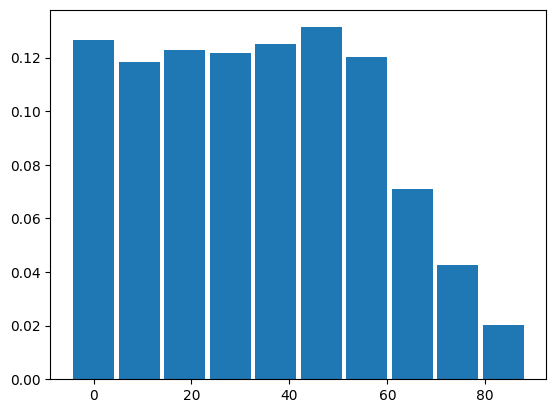

In [6]:
# Use the histogram function from the numpy library to create a histogram of the 'age' numerical feature
# The function returns two sets of values: 'hist', which contains the number of appearances of each bin,
# and 'bins', which contains the edges of the bins created with the default parameters of the histogram() function.
hist_age, bins_age = np.histogram(age)

# Normalize the histogram by dividing it by the sum of all bin counts
# This converts the histogram to a density function, which allows it 
# to be compared with histograms of other numerical features that
# have different scales.
hist_age = hist_age / hist_age.sum()

# Show the normalized histogram of age feature.

# Use the numpy.histogram() function to create a histogram with default parameters for the age feature. 
# This function returns two sets of values: the "hist" array contains the number of appearances of each bin, 
# while the "bins" array contains the edges of the bins.
hist_age, bins_age = np.histogram(age)

# Normalize the histogram and convert it to a probability density function 
# so that it can be compared with histograms of other numerical features that may have different scales.
hist_age = hist_age / hist_age.sum()

# Use the matplotlib.pyplot.bar() function to create a histogram from the "hist" and "bins" arrays. 
# The x-coordinates indicate the coordinates of the left side of each bar, which are stored in the 
# "bins" array by excluding the last # element of the array that corresponds to the last bar's right 
# side coordinates. The y-coordinates are determined by the "hist" array.
# The bars' width is set equal to 90% of the typical bin width.
plt.bar(bins_age[:-1], hist_age, width=(bins_age[1]-bins_age[0]) * 0.9)

# Display the histogram on the screen.
plt.show()

---
#### Persons sequence number

On the same note with the previous variable, the code presented below applies the numpy.histogram() function to the person sequence number (p_seq) numerical feature, which returns two sets of values: the "hist" that contains the number of appearances of each bin, and the "bins" which contains the edges of the bins created with the default parameters of the histogram() function.

The histogram is then normalized by dividing it by the sum of all bin counts. This converts the histogram to a density function, which allows it to be compared with histograms of other numerical features that have different scales.

The code uses the bar() function of the matplotlib library to print a histogram of the classes/bins formed for the p_seq numerical feature. The x-coordinates indicate the coordinates of the left side of each bar and they are stored in the bins array by excluding the last element of the array that corresponds to the last bar's right side coordinates. The frequencies of each class are stored in the hist array, which comprises the y-coordinates for each bar in the graph.

The bars' width is set equal to 90% of the typical class width. Finally, the code prints the graph on the screen using the show() function. 

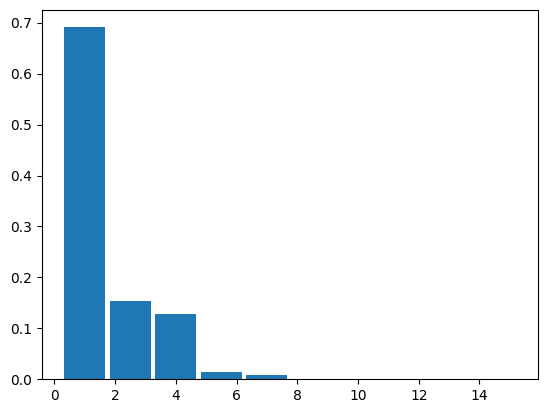

In [7]:
# Apply the histogram function of numpy library to the person sequence number numerical feature, 
# which returns two sets of values:
# the "hist" that contains the number of appearances of each bin and 
# the "bins" which contains the edges of the bins created
# with the default parameters of the histogram() function.
hist_pn, bins_pn = np.histogram(p_seq)

# Normalize the histogram and convert it to a density function
# so as to be comparable with the respective histograms of other numerical
# features that present different scales.
hist_pn = hist_pn / hist_pn.sum()

# Show the normalized histogram of the person sequence number feature.

# We use the bar() function of the matplotlib library to print a histogram
# of the classes/bins formed for the particular numerical feature.
# The x-coordinates indicate the coordinates of the left side of each bar 
# and they are stored in the bins array by excluding the last
# element of the array that corresponds to the last bar's right side coordinates.
# The frequencies of each class are stored to the hist array, which compromises
# the y-coordinates for each bar in the graph.
# The bars' width is set equal to 90% of the typical class width.
plt.bar(bins_pn[:-1], hist_pn, width=(bins_pn[1]-bins_pn[0]) * 0.9)

# Print the graph on the screen.
plt.show()

---
### Question B3: Applying Differential Privacy to Numeric Columns with Gaussian Mechanism
---
In Exercise B, we continue to work with the same dataset that was anonymized in the previous step using the Amnesia tool. In the previous steps, we explored the distribution of numeric features in the dataset using histograms. Now, we will apply a random noise mechanism to some of the numeric columns using the Gaussian mechanism in a way that preserves differential privacy. This step is crucial in protecting the privacy of individuals while still allowing for useful analysis of the dataset. We will then calculate the differentially private averages for the individuals using the noisy data and plot the distribution of numeric features after the noise addition. We will also experiment with different values of the epsilon (e) parameter and comment on the effect of differential privacy on the results. To accomplish this, we will use the differential-privacy-library and its notebooks available on the IBM's Github.

The first step is to import the Gaussian mechanism from the diffprivlib library. The Gaussian mechanism is a mechanism that adds random noise to the input data in a way that preserves differential privacy. Differential privacy is a strong privacy guarantee that ensures that the output of a computation does not reveal any information about the input data beyond what can be inferred from the output itself.

By using the Gaussian mechanism, we can add noise to the original values in a way that makes it difficult for an attacker to infer any specific information about the original data. The amount of noise added is determined by a privacy parameter called "epsilon" that specifies the maximum amount of privacy loss that we are willing to tolerate.

In this particular application, we will be applying the Gaussian mechanism to some of the numeric columns in our dataset in order to produce differentially private averages for each individual. We will then plot the distribution of the numeric features after the noise addition and observe the effect of differential privacy on the results.

In [8]:
# From the diffprivlib IBM library the mechanism that corresponds to the Gaussion distribution 
# as the random mechanism of creating added noise for the numerical attributes. 
from diffprivlib.mechanisms import  Gaussian

Differential privacy is a method of protecting the privacy of individuals whose data is being analyzed. The goal is to minimize the amount of information that can be inferred about an individual from the results of a computation while still allowing for useful data analysis.

One of the key parameters in differential privacy is epsilon (ε), which quantifies the degree of privacy loss that occurs due to a differential change in the data. A smaller value of epsilon means that the data is more private, but it also means that the statistical accuracy of the query may be lower.

Another parameter is delta (δ), which is a measure of the probability of privacy loss that occurs due to random fluctuations in the computation. For most implementations, delta is set to a very small value, such as 1e-5.

The sensitivity of the mechanism (sen) is also an important parameter. It refers to the maximum amount that a query's result can change when a single individual's data is added or removed from the dataset. The sensitivity of a query depends on the specific function being computed and the underlying data.

In our case study, we set epsilon to 1.0, which means that we are willing to tolerate a moderate degree of privacy loss to achieve reasonable statistical accuracy. We also set delta to 1e-5, which is a very small value that ensures a very low probability of privacy loss due to random fluctuations. Finally, we set the sensitivity of the mechanism to 5, which is a value that is appropriate for the specific function that we are computing. By tuning these parameters appropriately, we can balance the trade-off between privacy and accuracy to achieve the best possible results.

In [9]:
# Differential privacy method depends on some hypertunning parameters that are 
# predefined in certain levels and determine the trade-off between privacy loss 
# and statistical acuracy in the fundamental querries.

# The ε metric that quantifies the degree of privacy loss that occurs due to a differential change in the data.
epsilon = 1.0

# The δ parameter is set to zero for the usual implementation cases.
delta = 1e-5

# The sensitivity of the mechanism belongs to the spectrum of positive infinity inluding zero.
sen = 5

Now, we create an instance of the Gaussian mechanism from the diffprivlib library and we set its parameters to the values specified by the variables epsilon, delta, and sen. 

In [10]:
# Create the mechanism object and initialize its parameters.
mech = diffprivlib.mechanisms.Gaussian(epsilon=epsilon, delta=delta, sensitivity=sen, random_state=5)

Then, the following code creates two numeric vectors age and persons_num using the data dataframe. The age vector contains the values from the Age column of the data dataframe and is converted to float data type using the astype method. Similarly, the persons_num vector contains the values from the Person Sequence Number column of the data dataframe and is also converted to float data type.

In [11]:
# Create the numeric vectors for the values contained into the corresponding columns.
age = data['Age']
age = age.astype(float)

persons_num = data['Person Sequence Number']
persons_num = persons_num.astype(float)

Finally, the following command applies the randomise function of the Gaussian mechanism from the diffprivlib library to the age and persons_num numeric vectors. The randomise function adds random noise to each value in the vector while preserving differential privacy. The resulting values after applying the randomised function to age are stored in the vals_age_gauss vector, and the resulting values after applying the randomised function to persons_num are stored in the vals_pn_gauss vector. These randomised values are used for further analysis in the subsequent steps of the notebook.

In [12]:
# Apply the function randomise of the gaussian mechanism in order to produce
# randomise added values in the corresponding numerical vectors.

vals_age_gauss = [mech.randomise(x) for x in age]
vals_pn_gauss = [mech.randomise(x) for x in persons_num]

---
### Question B4: Calculating Differentially Private Averages for Numeric Features in a Dataset
---
In the previous steps of the notebook, we have applied k-anonymity and added random noise to the dataset in order to preserve the privacy of the individuals. In this step, we will calculate the differentially private averages for the individuals using the noisy data. Differential privacy is a strong privacy guarantee that ensures that the output of a query on a dataset does not reveal any sensitive information about individuals. We will use the differential privacy library provided by IBM to calculate the differentially private averages and then compare the results with the original averages. Finally, we will plot the distribution of numeric features after the noise addition and analyze the effect of differential privacy on the results.

To be more precise, in this step of the Jupyter notebook, we are calculating the differentially private averages for the numeric features in our dataset using the noisy data that we obtained in the previous step. Differential privacy is a privacy guarantee that ensures that the output of a query on a dataset does not reveal any sensitive information about individuals.

In [13]:
# Average of all individuals participate in the dataset concerning their 
# numeric features after the application of differential privacy with ε=1.
age_mean_ns = np.mean(vals_age_gauss)
pn_mean_ns  = np.mean(vals_pn_gauss)

# Print the averages for the numeric features.
print('The average age of all individuals in the dataset after the implementation of gaussian random noise is',age_mean_ns)
print('The average sequence persons number of all individuals in the dataset after the implementation of gaussian random noise is',round(pn_mean_ns))

The average age of all individuals in the dataset after the implementation of gaussian random noise is 38.33595378055988
The average sequence persons number of all individuals in the dataset after the implementation of gaussian random noise is 2


We are using the differential privacy library provided by IBM to calculate the differentially private averages with a privacy parameter (epsilon) of 1. We are then printing out the values of the average age and the average sequence persons number after the implementation of Gaussian random noise.

We are also calculating the average age and the average sequence persons number for the original dataset without noise and printing out these values as well for comparison.

In [14]:
# Average of all individuals participate in the dataset concerning their 
# numeric features in the initial dataset without noise.
age_mean = np.mean(age)
pn_mean  = np.mean(persons_num)

# Print the averages for the numeric features.
print('The average age of all individuals in the initial dataset is',age_mean)
print('The average sequence persons number of all individuals in the initial dataset is',round(pn_mean))

The average age of all individuals in the initial dataset is 38.274320537342646
The average sequence persons number of all individuals in the initial dataset is 2


From the above, we can summarize that the differential privacy library provided by IBM is used to calculate differentially private averages, and the results are compared with the original averages. The average age of all individuals in the dataset after the implementation of Gaussian random noise is found to be 38.34, and the average sequence persons number is 2. In comparison, the average age of all individuals in the initial dataset is 38.27, and the average sequence persons number is 2.

From the results, it can be interpreted that the addition of Gaussian random noise has slightly affected the average age of individuals in the dataset, as the differentially private average is slightly higher than the original average. However, the difference between the two averages is relatively small. Additionally, the average sequence persons number remained the same after the addition of noise. This shows that the differentially private averages calculated using the noisy data can provide a reasonable approximation of the true averages in the dataset while still preserving privacy.

---
### Question B5: Analyzing the Effect of Differential Privacy on Numeric Features Distribution
---
In the final step of Exercise B, we will plot the distribution of the numeric features after adding random noise using the Gaussian mechanism with different values of the privacy parameter epsilon (e). We will also comment on the effect of differential privacy on the results. This step will help us understand how the addition of noise affects the distribution of data and how it impacts the privacy guarantees provided by differential privacy. We will be using the differential privacy library provided by IBM for this step, which offers a range of functions for performing differentially private analysis.

#### Histograms of the Numeric Features after the Implementation of the Gaussian Noise

The first step is to plot histograms of the age feature in the dataset after the application of differential privacy. To achieve this, we use the NumPy function np.histogram() to calculate the histogram values and bin edges for the age feature based on the dataset that has been subjected to Gaussian random noise. The resulting histogram is normalized using the hist_norm = hist / hist.sum() statement, so that it can be compared to histograms of variables with different scales.

Next, we plot the histogram on a bar chart using the plt.bar() function, which takes the bin edges on the x-axis and the normalized histogram values on the y-axis. Finally, the plot is displayed on screen using the plt.show() function.

Overall, this code enables us to visually inspect the distribution of the age feature after the application of differential privacy, which helps us understand the impact of the noise addition on the data.

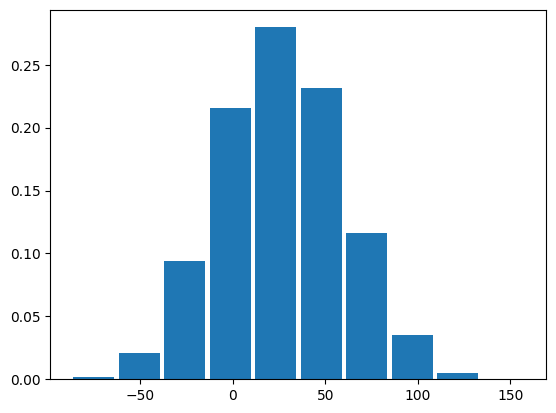

In [15]:
# Calculate the bins edges for the age histogram after the implementation of the differential privacy. 
dp_hist_age, dp_bins_age = np.histogram(vals_age_gauss)

# Normalize the histogram and turn it into a density function in order to be comparable 
# to many other histograms of variables of different scale.
dp_hist_age = dp_hist_age / dp_hist_age.sum()

# Show the normalized histogram of age feature.
plt.bar(dp_bins_age[:-1], dp_hist_age, width=(dp_bins_age[1]-dp_bins_age[0]) * 0.9)

# Print on screen the graph
plt.show()

On the same note, the following command plots a histogram of the sequence persons number feature in the dataset after the implementation of differential privacy. First, the np.histogram function is used to calculate the histogram values and bin edges for the sequence persons number feature. Then, the resulting histogram is normalized so that it can be compared to histograms of variables with different scales. Finally, the plt.bar function is used to plot the histogram on a bar chart, with bin edges on the x-axis and the normalized histogram values on the y-axis. The plt.show() function is used to display the plot on screen.

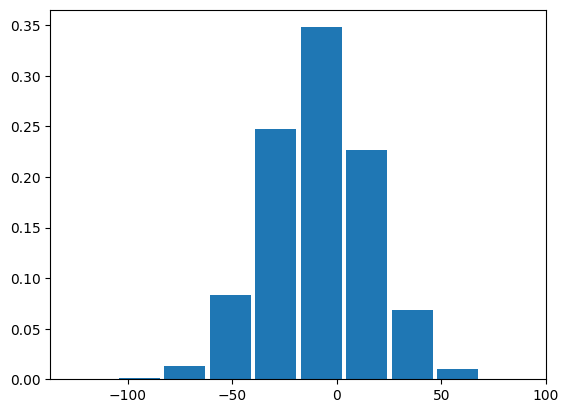

In [16]:
# Calculate the bins edges for the age histogram after the implementation 
# of the differential privacy. 
dp_hist_pn, dp_bins_pn = np.histogram(vals_pn_gauss)

# Normalize the histogram and turn it into a density function in order to be 
# comparable to many other histograms of variables of different scale.
dp_hist_pn = dp_hist_pn / dp_hist_pn.sum()

# Show the normalized histogram of age feature.
plt.bar(dp_bins_pn[:-1], dp_hist_pn, width=(dp_bins_pn[1]-dp_bins_pn[0]) * 0.9)

# Print on screen the graph.
plt.show()

#### Metrics of Noise Implementation Impact Assessment
To evaluate the impact of the differential privacy implementation on the dataset, we can compare the histograms of the original data and the differentially private data. One way to quantify the difference between the two histograms is to calculate the total histogram error, which is the sum of the absolute differences between the bin values of the original and differentially private histograms.

The following lines of code calculate the total histogram error for the age and sequence person number attributes:

In [17]:
# Histogram error for each numeric feature between the intial 
# feature values and the differentiated privacy values.
print("Total histogram error for the age attribute: %f" % np.abs(hist_age - dp_hist_age).sum())
print("Total histogram error for the sequence person number attribute: %f" % np.abs(hist_pn - dp_hist_pn).sum())

Total histogram error for the age attribute: 0.697411
Total histogram error for the sequence person number attribute: 1.918309


The np.abs() function is used to take the absolute differences between the bin values of the original and differentially private histograms. The sum() function is used to sum up these absolute differences to get the total histogram error.

The output shows that the total histogram error for the age attribute is 0.697411 and for the sequence person number attribute is 1.918309. These values represent the degree of distortion that was introduced by the differential privacy implementation. A smaller total histogram error would indicate less distortion, while a larger total histogram error would indicate more distortion.

#### Search for Optimal ε Value in the Gaussian Random Noise Mechanism

To do so, we implemented the following code. This code first creates a vector of possible ε values for hyperparameter tuning. Then, a for loop is used to calculate for each ε value the different levels of noise added in the remaining attributes using the Gaussian mechanism object with the current ε value. The differentially private values for the age and person number attributes are calculated using the randomise method of the mechanism object. Then, the histogram parameters of the differentially private values are calculated using the np.histogram function and normalized to be comparable to histograms of variables with different scales. Finally, the histogram error results are printed on the screen between the initial histogram and the histogram of the differentially private values for each ε value in the epsilons vector.

In [18]:
# Vector of possible epsilon values created for the hypertunning process.
epsilons = [0.01, 0.1, 0.5, 0.8, 1]

# Create the for loop that calculates for each epsilon value the 
# different levels of noise added in the remained attributes.
for epsilon in epsilons:
    # Create the guassian mechanism object. 
    mech = diffprivlib.mechanisms.Gaussian(epsilon=epsilon, delta=delta, sensitivity=sen, random_state=5)
    
    # Calculate the differentiated values.
    vals_age_gauss = [mech.randomise(x) for x in age]
    vals_pn_gauss = [mech.randomise(x) for x in persons_num]

    # Calculate the histogram parameters of the differentiated values.
    dp_hist_age, dp_bins_age = np.histogram(vals_age_gauss)
    dp_hist_age = dp_hist_age / dp_hist_age.sum()

    dp_hist_pn, dp_bins_pn = np.histogram(vals_pn_gauss)
    dp_hist_pn = dp_hist_pn / dp_hist_pn.sum()

    # Print the histogram error results on screen between the initial histogram and the histogram
    # of the differentiated on privacy terms values.
    print("Total histogram error for the age attribute: %f" % np.abs(hist_age - dp_hist_age).sum(), 'for ε=', epsilon)
    print("Total histogram error for the sequence person number attribute: %f" % np.abs(hist_pn - dp_hist_pn).sum(),'for ε=', epsilon)

Total histogram error for the age attribute: 0.825964 for ε= 0.01
Total histogram error for the sequence person number attribute: 1.917530 for ε= 0.01
Total histogram error for the age attribute: 0.828055 for ε= 0.1
Total histogram error for the sequence person number attribute: 1.917842 for ε= 0.1
Total histogram error for the age attribute: 0.788933 for ε= 0.5
Total histogram error for the sequence person number attribute: 1.918220 for ε= 0.5
Total histogram error for the age attribute: 0.737289 for ε= 0.8
Total histogram error for the sequence person number attribute: 1.918353 for ε= 0.8
Total histogram error for the age attribute: 0.697411 for ε= 1
Total histogram error for the sequence person number attribute: 1.918309 for ε= 1


The results of the optimal epsilon search show that increasing the value of epsilon leads to lower total histogram errors for the age attribute. Specifically, the total histogram error decreases from 0.826 for epsilon equal to 0.01 to 0.697 for epsilon equal to 1. However, for the sequence person number attribute, increasing epsilon did not lead to a significant improvement in terms of total histogram error. The total histogram error for this attribute stays almost constant, around 1.918, for all values of epsilon.

This suggests that increasing the value of epsilon can improve the accuracy of differentially private computations, but the amount of improvement depends on the attribute being analyzed. It is important to balance the privacy requirements and the accuracy of the computations to choose an appropriate value of epsilon.

---
### Conclusions
---

* As expected as the e parameter gets higher more noise is added and the privacy protection is agmumented as the differentiated data are more far away from the initial ones and consequenlty the histogram error rises as the two data sets are less alike with the danger to provide more biased and inaccuarate statistical analysis results.


* The histograms after the implementation of the guassian noise are more close to the gaussian distribution and far away from the initial distributions of the features so maybe the guassian  mechanism is not the most appropriate one laplace mechanism could be implemented for further investigation for optimal results of in the differential privacy process.